In [1]:
import pandas as pd

url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(url)
dados.sample(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
6096,6096,23039,2005,61034.74,no
1163,1163,14354,2009,39960.44,yes
4284,4284,6021,2004,76326.08,no
2396,2396,10317,2014,108003.72,yes
1745,1745,27404,2003,42637.92,no


In [6]:
a_renomear = {
    'mileage_per_year' : 'milhas_ano',
    'model_year' : 'ano_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns = a_renomear)
dados.head(10)

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [7]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head(5)

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [9]:
from datetime import datetime
ano_atual = datetime.today().year

dados['idade_modelo'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [10]:
dados['km_ano'] = dados.milhas_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_ano,ano_modelo,preco,vendido,idade_modelo,km_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [12]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_ano", "ano_modelo"], axis = 1)
dados.head()

,preco,vendido,idade_modelo,km_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

x = dados[["preco", "idade_modelo", "km_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(f"Treino com {len(treino_x)} e teste com {len(teste_x)} elementos.")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = round((accuracy_score(teste_y, previsoes) * 100), 2)
print(f"A acuracia foi de {acuracia}%")

Treino com 7500 e teste com 2500 elementos.
A acuracia foi de 62.8%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = round(dummy_stratified.score(teste_x, teste_y) * 100, 2)

print(f"A acuracia do dummy most frequent foi de {acuracia}%")

A acuracia do dummy most frequent foi de 52.44%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [31]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = round(dummy_mostfrequent.score(teste_x, teste_y) * 100, 2)

print(f"A acuracia do dummy most frequent foi de {acuracia}%")

A acuracia do dummy most frequent foi de 50.68%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

x = dados[["preco", "idade_modelo", "km_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(f"Treino com {len(raw_treino_x)} e teste com {len(raw_teste_x)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = round((accuracy_score(teste_y, previsoes) * 100), 2)
print(f"A acuracia foi de {acuracia}%")

Treino com 7500 e teste com 2500 elementos.
A acuracia foi de 77.48%


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

x = dados[["preco", "idade_modelo", "km_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(f"Treino com {len(raw_treino_x)} e teste com {len(raw_teste_x)} elementos.")

modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = round((accuracy_score(teste_y, previsoes) * 100), 2)
print(f"A acuracia foi de {acuracia}%")

Treino com 7500 e teste com 2500 elementos.
A acuracia foi de 79.28%


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


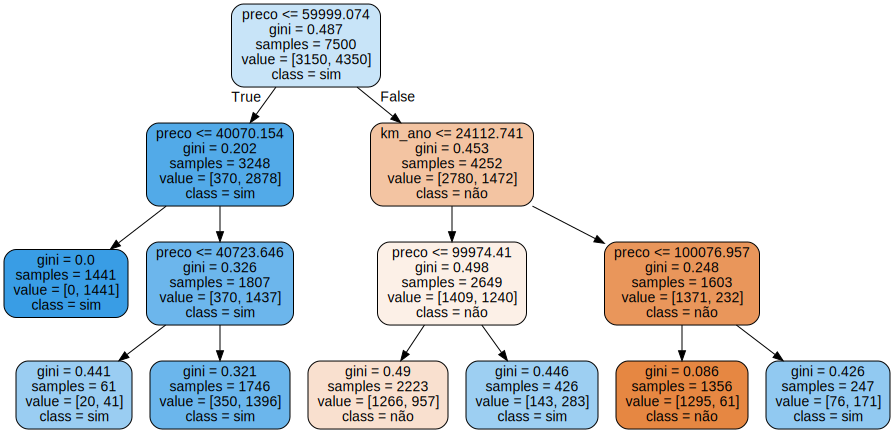

In [53]:
!pip install graphviz
!apt-get install graphviz

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None,
                           feature_names = features,
                           filled = True, rounded = True,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico